<a href="https://colab.research.google.com/github/kev1092/Lab1-CV-course-HH/blob/main/Lab1_Color_and_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/kev1092/Lab1

Cloning into 'Lab1'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 25 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [1]:
# Credits washington university

import matplotlib.pyplot as plt
import numpy as np
import cv2

# Libraries and images

We encode images as 3 dimensional tensors. In each image we have spatial information, represented as row and column coordinates in the image, and channel information that combines together to form the color.

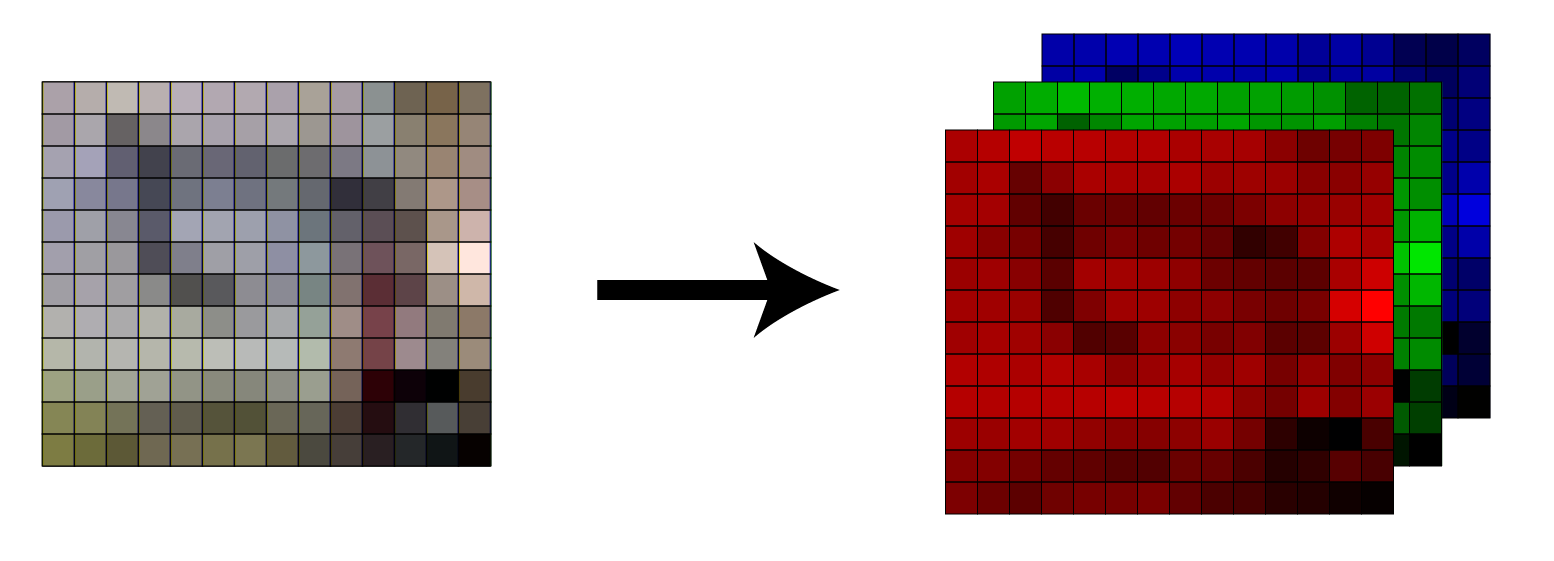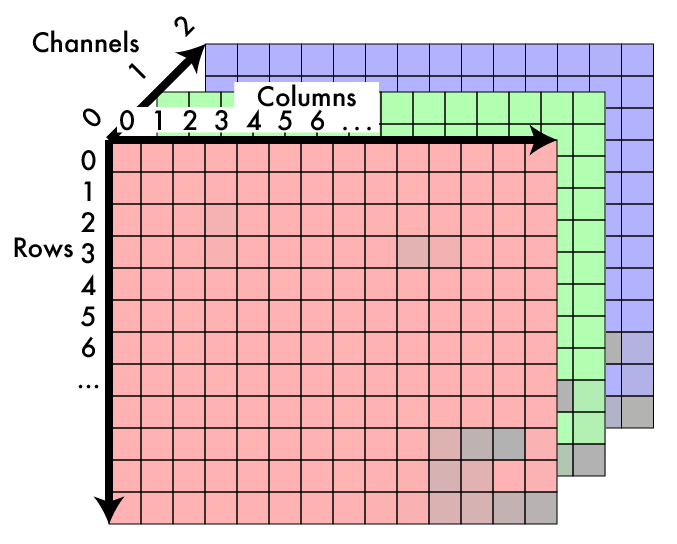

Since images are encode as arrays/matrices/tensors, the coordinate system usually starts on the top-left corner.

There are several color systems RGB, BGR, HSV, CMYK... depending on the field and purpose of the image one or other are usually used. However the most common system is RGB, with each image being an array of unsigned 8-bits integers. So each pixel is formed by three channel information, representing the intensity of red, green and blue respectively ranging from 0 to 255. However, each library has their own particularities see the example below




Let's import our first image! First open the file on your computer and check how it looks like!

Let's import it with OpenCV library. OpenCV is one of the most common and oldest libraries especialised for computer vision projects!

please remember to import your image to the working environment before executing this!

In [4]:
img = cv2.imread("Lab1/flowers.png")

perfect! let's check the image out! Let's use matplotlib for that

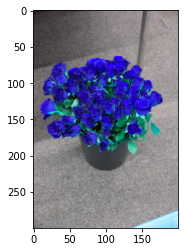

In [5]:
plt.imshow(img)

hmmm... something seems off... the image looks much more blue than it should. Let's try using a function from the OpenCV library

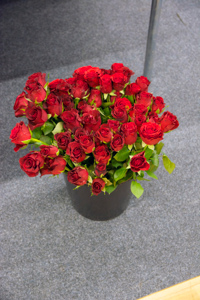

In [6]:
# We have to use this function because of the jupyter environment and the way that OpenCV imshow works. 
# The original function would be cv2.imshow
from google.colab.patches import cv2_imshow 
cv2_imshow(img)

Now it looks good! But why is that?

Well even though as we said earlier the custom is to use RGB and uint8 type for images, OpenCV works on a Blue,Green,Red(BGR) system while matplotlib was expecting an RGB image. The reason of this seems to be backward-compatibility and historical reasons, from a time when BGR was popular among camera manufacturers and software providers.

Furthermore, let's check the following case

In [7]:
img = plt.imread("Lab1/flowers.png")

Now let's check the actual image pixel values

In [8]:
print("maximum pixel value in the image: {}".format(np.max(img)))
print("minimum pixel value in the image: {}".format(np.min(img)))

maximum pixel value in the image: 1.0
minimum pixel value in the image: 0.0


It seems that the pixel values are float and in the range 0-1 but why is that? Well... matplotlib import "png" images like that! 
So, what is the moral of this story? Be careful! even though the common case is treating images as RGB (or grayscale) and with pixel values in the range [0,255], each library and framework can have their own particularities even for simple things as reading/importing images further than notation/arguments! This can be a problem when using functions from different libraries

# Color

Humans do not see colors equally. Next image show the human eye's sensitivity for different colors
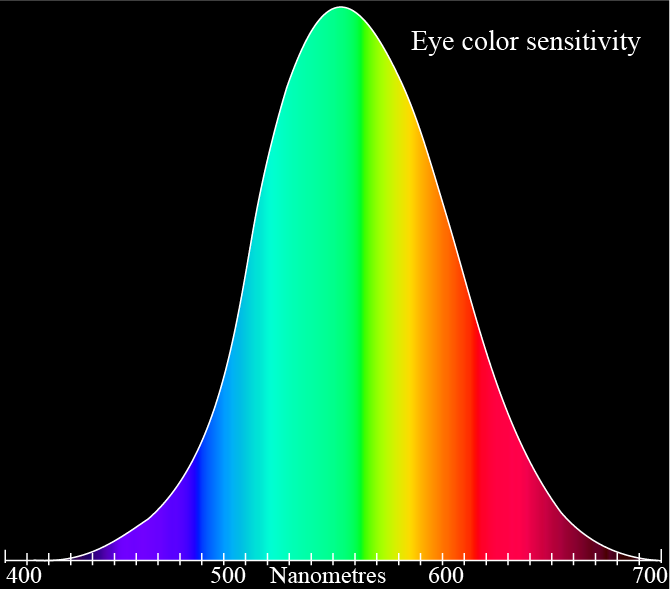

We can see that we are much more sensitive to shades of green than purple or dark red. Let's see how this affect some CV applications, for example transforming color images to black and white.

Intuitively, if we would like to transform an RGB image to a gray one, we would try to do the average value of the RGB channels per pixel to create a the gray one.

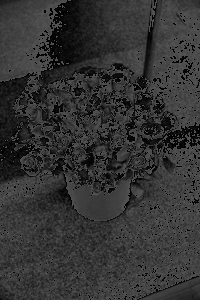

In [9]:
# TO DO: take the average pixel value of our image and display it, for example use the OpenCV library

img = cv2.imread("Lab1/flowers.png")

# take the average pixel value (you can use whatever library you want or just do normal python idexing) OBS! remember that the image format is (rows,columns,channels)
#img2 = ...
img2 = ((img[:,:,0]+img[:,:,1]+img[:,:,2])/3).astype("uint8")
cv2_imshow(img2)


Well... that seems completely off, not our typical black and white image... execute the following code to see how it should look like

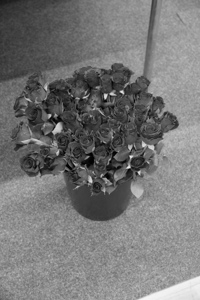

In [10]:
cv2_imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

Now  it looks much better, but why? 

Well as we saw earlier in the figure about color sensitivity, we do not percieve all colors in the same way. So instead of calculating the average pixel value, we are going to do a weighted sum. Video engineers use a calculation called luma to find an approximation of perceptual intensity when encoding video signal, we'll use that to convert our image to grayscale. It operates directly on the gamma compressed sRGB values that we already have! We simply perform a weighted sum:

Y' = 0.299 R' + 0.587 G' + .114 B'

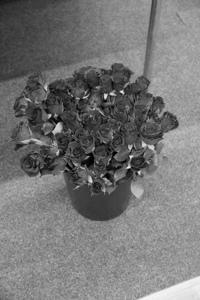

In [11]:
# TO DO: use the weighted sum from above to calculate your gray image

#imgg2 = ...

img2 = img[:,:,0]*0.114 + img[:,:,1]*0.587 + img[:,:,2]*0.299

# Now let's try again!

cv2_imshow(img2)

Now it looks much better! 

Now let's talk about other color spaces, for example, HSV. HSV stands for Hue, Saturation, Value. Hue can be thought of as the base color of a pixel. Saturation is the intensity of the color compared to white (the least saturated color). The Value is the perception of brightness of a pixel compared to black. You can try out this [demo](https://math.hws.edu/graphicsbook/demos/c2/rgb-hsv.html) to get a better feel for the differences between these two colorspaces. For a geometric interpretation of what this transformation:

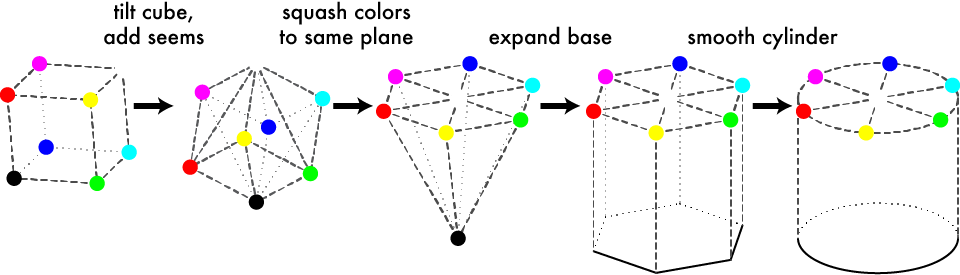

We can make use of these other representations to, for example, navigate through the colors/filter them/segment them in an easier way. 

For example let's see what is the Hue value for red



In [12]:
# let's get the reference for pure red

red_rgb = np.uint8([[[255,0,0 ]]]) #pure red in an RGB 
red_hsv = cv2.cvtColor(red_rgb,cv2.COLOR_RGB2HSV)

# let's see its value in HSV!

print("value for pure red color in HSV format: {}".format(red_hsv))

value for pure red color in HSV format: [[[  0 255 255]]]


We can see the actual color range in the Hue value in the following image. We can then select the range of color we want to segment out. Let's say we want to segment out the red content/sprinkles in the image. We can do that as following

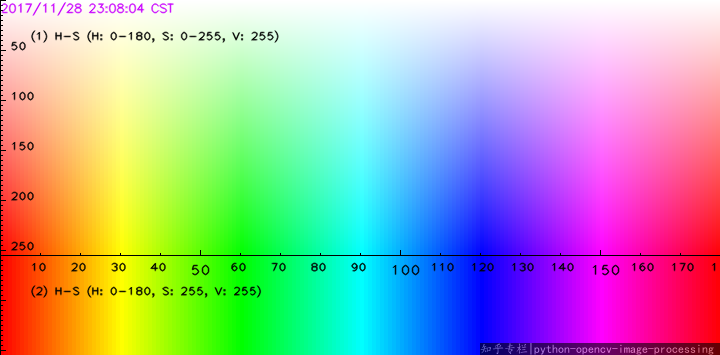

credtis:https://cvexplained.wordpress.com/2020/04/28/color-detection-hsv/

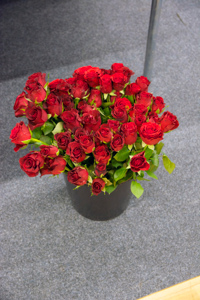

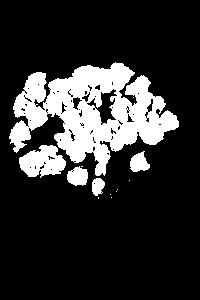

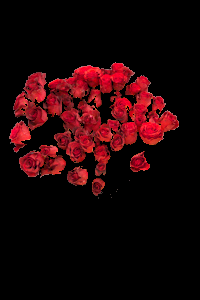

In [13]:

# We first transform our image to HSV

img3 = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# We then get our boundary region based on the Hue image from before 
# We see that red should be in the range (0-10) and (170-180)

# lower boundary RED color range values; Hue (0 - 10)
lower1 = np.array([0, 50, 50]) 
upper1 = np.array([10, 255, 255])
 
# upper boundary RED color range values; Hue (160 - 180)
lower2 = np.array([169,50,50])
upper2 = np.array([179,255,255])

# notice in the code above the values for saturation and brightness
# we have to still set some lower and upper boundary for these based on how dark and intense the color of our images are
# these values will affect the noise from dark regions/colors and of course the accuracy of our filter
 
# we create a mask representing the pixel that falls in our especified range
lower_mask = cv2.inRange(img3, lower1, upper1)
upper_mask = cv2.inRange(img3, lower2, upper2)
 
# we combine the mask from both regions to create a unique mask
# notice that we have to do this because of the "cut" for the red color in HSV
full_mask = lower_mask + upper_mask;

# Here we filter the pixels in the image with our mask
img3 = cv2.bitwise_and(img3, img3, mask=full_mask)

# we show back our images
cv2_imshow(img)
cv2_imshow(full_mask)
img3 = cv2.cvtColor(img3,cv2.COLOR_HSV2BGR)
cv2_imshow(img3)


Done! We can see that even if not perfect, we have effectively segmented the red regions in the image! Furthermore, we can see here, how this can potentially be used for object detection in images.

# Image Filtering

One of the most common and powerful operations that we can do with an image is to use a filter on it. In this lab we will be using gaussian filter to blur an image (low-pass filter), extract high frequency components (high-pass filter) and how to use them to enhance contrast!

So, how is the filtering process? Applying a filter to an image is doing a 2D convolution operation between an image and a filter. We know what an image is and how it is represented in our environment, basically an array/matrix where each pixel is a cell in the 3D array. But what is a filter and how it is represented? A filter is nothing else than a (usually) smaller matrix encoding the linear transformation that we want to apply to the image.

So, we have 2 matrices with different sizes, how do we apply this filter? What is a 2D convolution? Well, what we do is place our filter at the very first pixel of the image (remember that since it is an array we consider the first pixel the top left one), do a scalar product between the filter and the area of the same size of our filter, around said pixel, and we are going to store that value in our output array at the same location that we are in. We repeat this operation for every pixel in the image doing a sweep over every row in the image.

Notice that technically, this is not a convolution, since in a convolution we need to flip our filter, in this case we are doing 2D cross-correlation, but everyone and everywhere call it convolution, the thing is that this flip operation is just a trivial step. 

For a step by step 2D convolution example watch the gif below. In this case the filter used is a sharpening filter different to the way we are going to do later



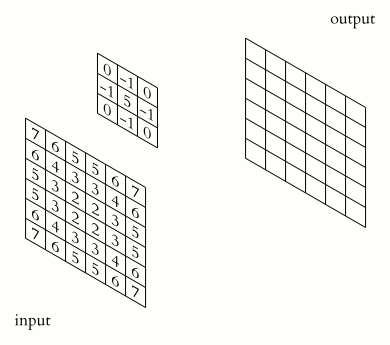

Credits: Michael Plotke / CC BY-SA (https://creativecommons.org/licenses/by-sa/3.0)

Notice what happens at the border. In the border pixels, when we center our filter on them there is no information beyond the image limits, so we cannot do a scalar product! This issue and how to go around it is what we call padding, and there are several ways to deal with this problem, from just ignoring the pixels where this happens (usually referred as valid-padding) to fill this void region in some ways. Please take a look at the image below for some examples 

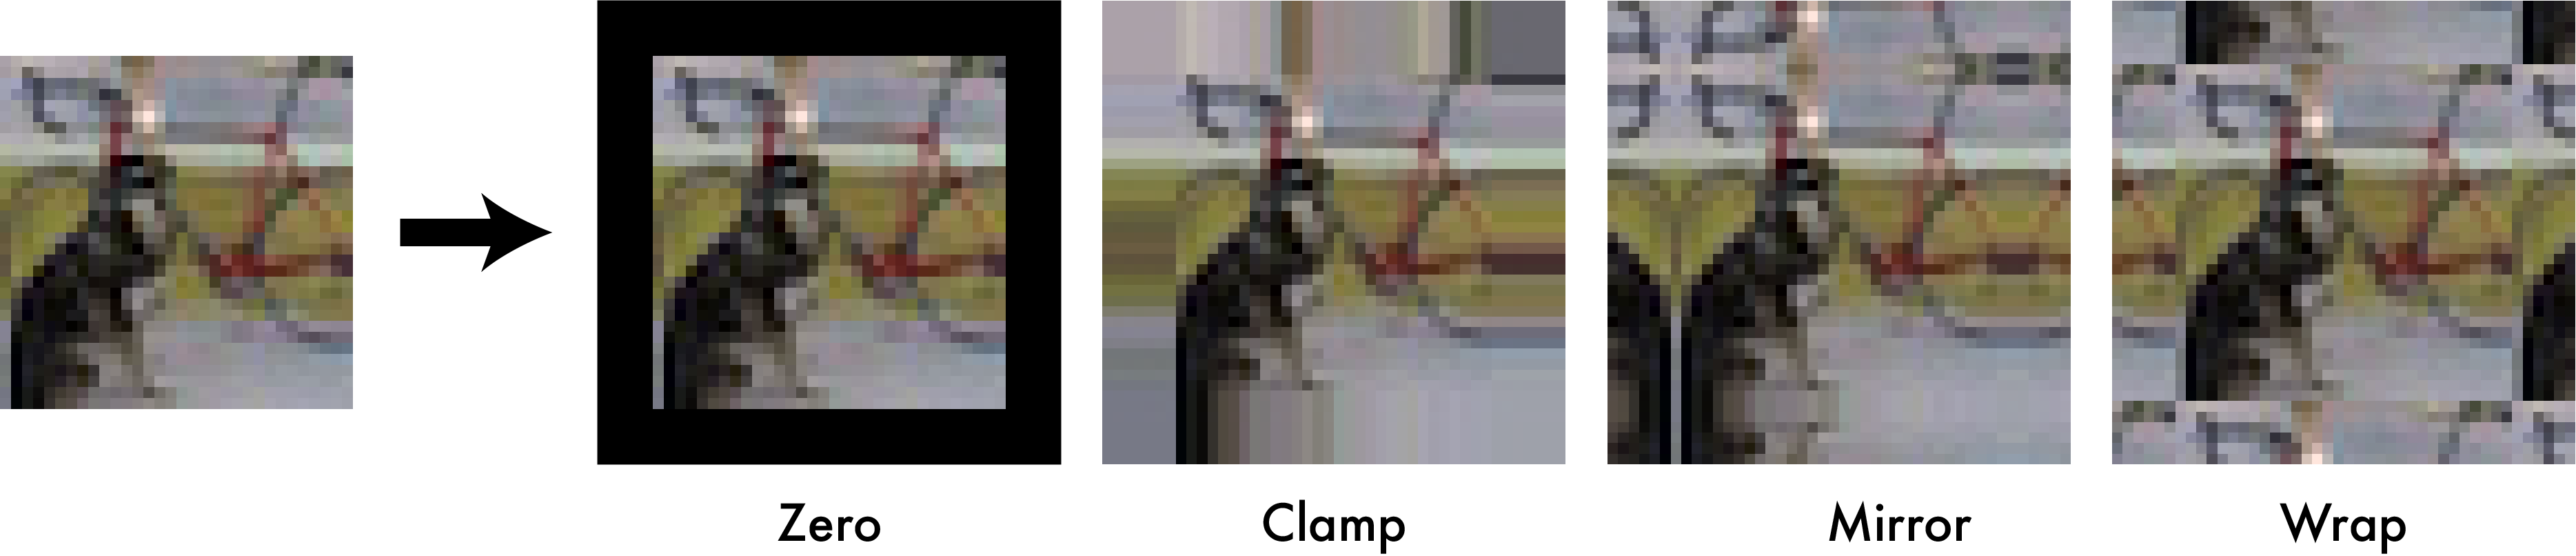


Ok, so let's implement our gaussian filter! for that we will only the parameter sigma that defines the standard deviation of our 2d gaussian distribution. But, how big should the filter be then? A gaussian distribution concentrates 99% of the probability mass within +/- 3 standard deviations from the mean value, so we will make the kernel 6 times the size of sigma. But also we want an odd number, so make it be the next highest odd integer from 6x sigma.

Remember that a 2D Gaussian distribution follows the formula:

$G(x,y) = \frac{1}{2πσ^2}\mathrm{e}^{-\frac{x^2 + y^2}{2σ^2}}$


Gaussian are blurring filters, they blurr the image by smoothing the pixel values over an area. So, we can configure our gaussian filters as a weighted sum. Furthermore, since we want all the weights to sum to 1, we can "forget" about the first part of the equation for our filter. 



In [21]:
img = cv2.imread("Lab1/placa.jpg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# we define our sigma and create the grid for our filter

sigma = 2
x, y = np.meshgrid(np.arange(np.floor(-3*sigma),np.ceil(3*sigma+1),1), np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1))

# create the actual filter
filt = np.exp(-( (x**2+y**2) / ( 2.0 * sigma**2 ) ) )
filt = filt/np.sum(filt)



One good thing about gaussian filters over other blurring/smoothing filters like an averaging filter is that gaussian are isotropic, they treat all directions the same. Let's plot our filter

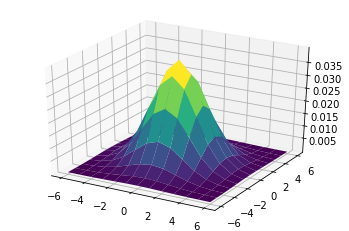

In [15]:
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, filt,cmap='viridis', edgecolor='none')


It looks nice! Now let's convolve our image with our filter. In order to understand better the frequencies changes we will be using the grayscale image. high frequency components are defined as big pixel value changes in adjacents/close pixels. So let's see our output after convolving the original image with our gaussian filter

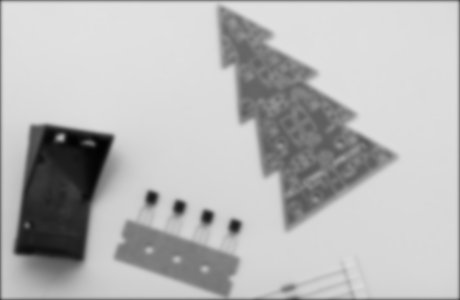

In [22]:
res = cv2.filter2D(img2,-1,filt,borderType=cv2.BORDER_CONSTANT)

cv2_imshow(res)

It does in fact look much blurrier! Since high frequency areas in images are defined as big pixel value changes in nearby pixels, and the gaussian filter smooth out the pixel values in an area, we are effectively destrying this information from the image. We can see exactly what information are we removing by plotting the difference between the real image and the gaussian version

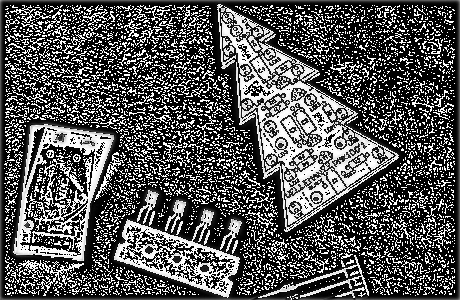

In [23]:
cv2_imshow(img2-res)

We can see that most of the removed information comes from edges, which makes sense since edges shows a sudden difference/change between and in objects.

However, here we are using a low-pass filter to substract from the original image the low-frequency components, efectively keeping the high frequencies, but... is there a more direct way to do so? The answer is yes! using derivative filters

Derivative filters are high-pass filters! they extract the information on how much the neighbor pixels changes respect the center pixel. We are going to use gaussians to create a new derivative filter to extract the high frequency components from the images.

How? just calculating the derivative of our original gaussian respect to x and y

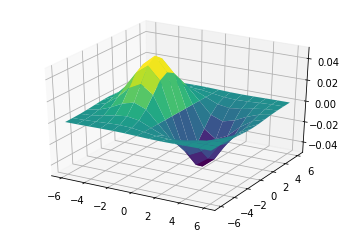

In [24]:
# we define our sigma and create the grid for our filter

sigma = 2
x, y = np.meshgrid(np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1), np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1))

# create the actual filter
filtx = -x*np.exp(-( (x**2+y**2) / ( 2.0 * sigma**2 ) ) )/(2*np.pi*sigma**2)
filty = np.transpose(filtx)

ax = plt.axes(projection='3d')

ax.plot_surface(x, y, filtx,cmap='viridis', edgecolor='none')


Now let's see how our edge detector works

Text(0.5, 1.0, 'all')

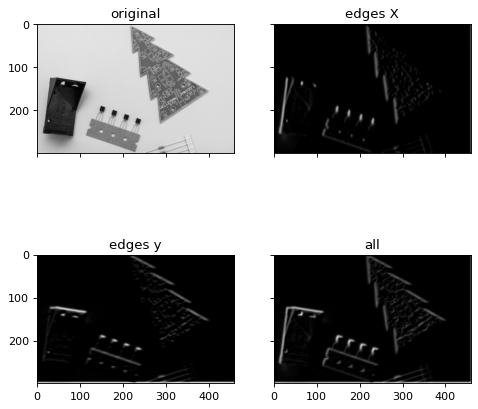

In [25]:
edgex = cv2.filter2D(img2,-1,filtx,borderType=cv2.BORDER_CONSTANT)
edgey = cv2.filter2D(img2,-1,filty,borderType=cv2.BORDER_CONSTANT)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7), dpi=80, sharex=True, sharey=True)
ax[0,0].imshow(img2,cmap="gray")
ax[0,0].set_title('original')

ax[0,1].imshow(edgex,cmap="gray")
ax[0,1].set_title("edges X")

ax[1,0].imshow(edgey,cmap="gray")
ax[1,0].set_title('edges y')

ax[1,1].imshow(np.abs(edgex+edgey),cmap="gray")
ax[1,1].set_title("all")

In the above image we can see that our edge-X detector has a high response when there is a vertical lines, meaning a high change along the x axis. In the figure edges y, we can see the exact same behaviour but in this case for horizontal lines/edges, meaning sudden change along the y axis.

The color in these figures shows the direction of the change in terms of pixel value, from white to black (showed with white lines) and from black to white (represented as black lines) while the areas where there are no edges appear as gray.

In the final figure we show all edges dected in the image together regardless of their direction.

we can use gaussians to also enhanced contrast, see the following example

Text(0.5, 1.0, 'original')

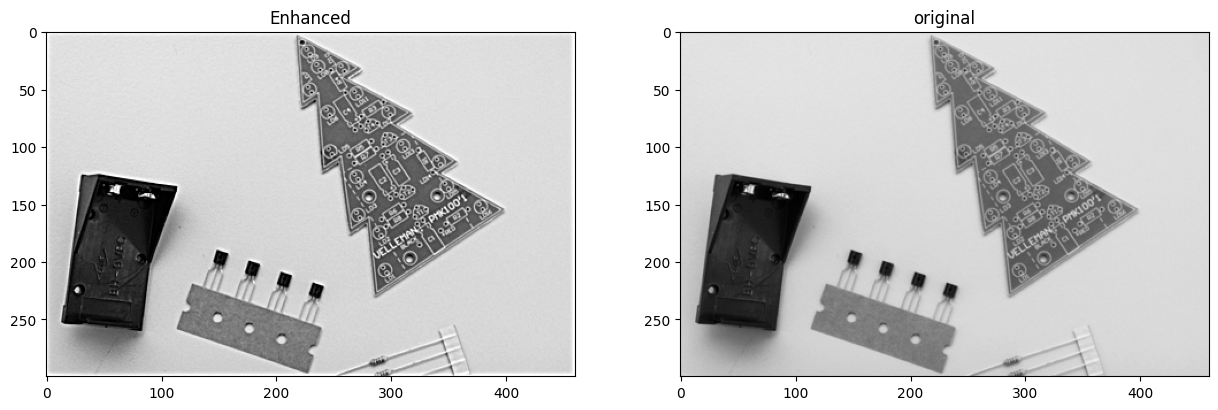

In [26]:
enhanced = np.clip(2*img2.astype("float") - res,0,255) # we need to cast img2 to avoid overflow
fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(enhanced,cmap="gray")
ax.set_title('Enhanced')
ax = fig.add_subplot(1,2,2)
plt.imshow(img2,cmap="gray")
ax.set_title("original")

We can clearly see that our enhanced version has a higher contrast respect to the original. 

We have seen a way to enhanced contrast using a low-pass filter. Simply by multiplying the original pixel value and substracting part of the low frequency information, leaving the high frequency components untouched.



### Other commonly used filters
Finally, we can see examples of other well-known filters as the averaging filter, sobel operator, laplacian operator and a contrast-enhancing filter. Pay attention to the structure of each of these filters and the response that they get and try to understand why they get that response.

Text(0.5, 1.0, 'Contrast enhancing')

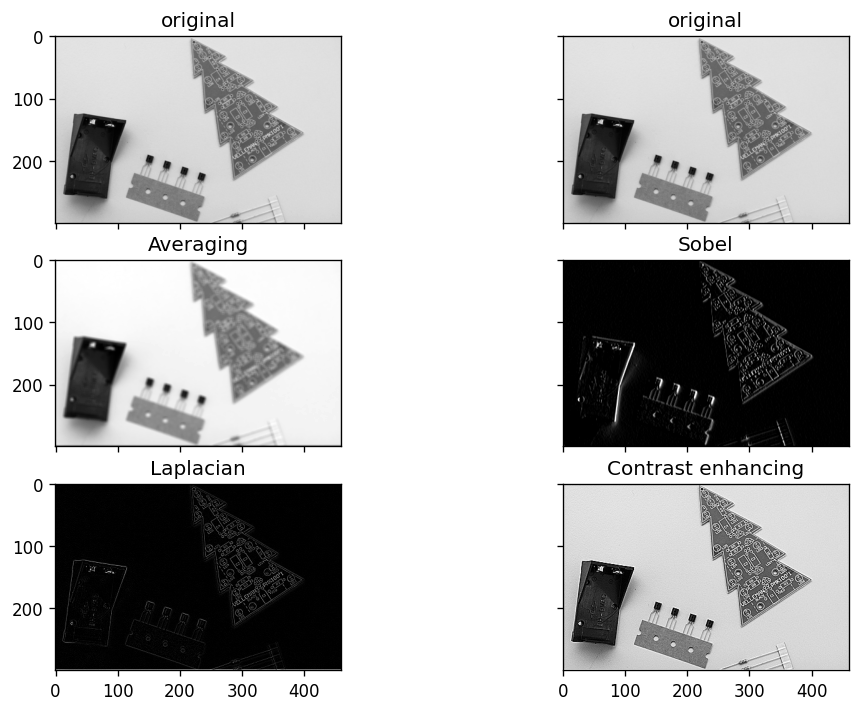

In [27]:
averaging = np.ones((5,5))/25
sobel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
laplacian = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
contrast = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

res_averaging = cv2.filter2D(img2,-1,averaging,borderType=cv2.BORDER_CONSTANT)
res_sobel = cv2.filter2D(img2,-1,sobel,borderType=cv2.BORDER_CONSTANT)
res_lap = cv2.filter2D(img2,-1,laplacian,borderType=cv2.BORDER_CONSTANT)
res_cont = np.clip(cv2.filter2D(img2,-1,contrast,borderType=cv2.BORDER_CONSTANT),0,255)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 7), dpi=120, sharex=True, sharey=True)
ax[0,0].imshow(img2,cmap="gray")
ax[0,0].set_title('original')

ax[0,1].imshow(img2,cmap="gray")
ax[0,1].set_title('original')

ax[1,0].imshow(res_averaging,cmap="gray")
ax[1,0].set_title("Averaging")

ax[1,1].imshow(res_sobel,cmap="gray")
ax[1,1].set_title('Sobel-vertical')

ax[2,0].imshow(res_lap,cmap="gray")
ax[2,0].set_title("Laplacian")

ax[2,1].imshow(res_cont,cmap="gray")
ax[2,1].set_title("Contrast enhancing")

We can see how we obtain similar responses to our previous experiments with these filters. Each filter has its own pros and cons.

# Homework!

Use the code in the color section to segment out the X color in image Y

Implement a function that does the convolution between an image and a filter. The output of this convolution has to be of the same size as the input image. Use constant padding with value 0, and consider that the images will be in grayscale

create another function similar to the previous one that applies a median filter to the image.

In [29]:
# Segment out all pixels with X color
# Notice that the segmentation do not need to be perfect
# Use image "placa.jpg"

img_color = cv2.imread("Lab1/placa.jpg")
# TO DO




In [30]:
# my convolution function
# input images will be in black and white
# consider constant padding with value 0, you can make use of cv2.copyMakeBorder()

def myconv(img,filt):
  # TO DO
  return output

# you can check your results with the averaging filter

averaging = np.ones((5,5))/25
out_check = cv2.filter2D(img2,-1,averaging,borderType=cv2.BORDER_CONSTANT)

myout = myconv(img2,averaging)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=100, sharex=True, sharey=True)
ax[0,0].imshow(out_check,cmap="gray")
ax[0,0].set_title('check')

ax[0,1].imshow(myout,cmap="gray")
ax[0,1].set_title("mine")

#L2-error
error = np.sum((myout-out_check)**2)
print(error)


NameError: ignored

In [31]:
probnoise = 0.05
noise = np.random.rand(img2.shape[0],img2.shape[1])
black = noise <= probnoise/2
white = noise >= 1-probnoise/2

imnoise = img2.copy()
imnoise[black]=0
imnoise[white]=255


def medianfilter(imnoise):
  # TO DO
  return output

cleanout = medianfilter(imnoise)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=100, sharex=True, sharey=True)
ax[0,0].imshow(imnoise,cmap="gray")
ax[0,0].set_title('Noisy image')

ax[0,1].imshow(cleanout,cmap="gray")
ax[0,1].set_title("Clean image")

#L2-error
error = np.sum((img2-Clean image)**2)
print(error)

SyntaxError: ignored